In [16]:
!pip install -Uqq pydub

In [17]:
from pydub import AudioSegment
from fastai.vision.all import *
from pydub.playback import play
from IPython.display import Audio, display
import torch
import torchaudio
import torchaudio.functional as F
import torchaudio.transforms as T
import librosa
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
import numpy as np

In [18]:
def plot_spectrogram(specgram, title=None, ylabel=None, ax=None):
    if ax is None:
        _, ax = plt.subplots(1, 1)
    if title is not None:
        ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.imshow(librosa.power_to_db(specgram), origin="lower", aspect="auto", interpolation="nearest")

n_fft = 1024
win_length = None
hop_length = 512
n_mels = 128
sample_rate = 48000

mel_spectrogram = T.MelSpectrogram(
    sample_rate=sample_rate,
    n_fft=n_fft,
    win_length=win_length,
    hop_length=hop_length,
    center=True,
    pad_mode="reflect",
    power=2.0,
    norm="slaney",
    n_mels=n_mels,
    mel_scale="htk",
)

/usr/local/lib/python3.10/dist-packages/torchaudio/functional/functional.py:584: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (513) may be set too low.
  warnings.warn(


In [19]:
paths = Path('/content/drive/MyDrive/VoiceRecognition/Test')

In [21]:
data = get_files(paths, extensions='.mp3')
data

(#6) [Path('/content/drive/MyDrive/VoiceRecognition/Test/Agustin_Lopez/Agustin_Lopez_Test.mp3'),Path('/content/drive/MyDrive/VoiceRecognition/Test/Ana_Sofia_Calle/Ana_Sofia_Calle_Test.mp3'),Path('/content/drive/MyDrive/VoiceRecognition/Test/Daniel_Ospina/Daniel_Ospina_Test.mp3'),Path('/content/drive/MyDrive/VoiceRecognition/Test/Elisa_Garcia/Elisa_Garcia_Test.mp3'),Path('/content/drive/MyDrive/VoiceRecognition/Test/Juan_Camilo_Ospina/Juan_Camilo_Ospina_Test.mp3'),Path('/content/drive/MyDrive/VoiceRecognition/Test/Laura_Patino/Laura_Patino_Test.mp3')]

In [ ]:
str_path = str(data[0])
new = str_path.replace('Dataset','DatasetImages')
new2 = new.replace('.wav', '.jpg')
new2

'/content/drive/MyDrive/VoiceRecognition/DatasetImages/Agustin_Lopez/Agustin_Lopez_Principito_80.jpg'

In [ ]:
names = ['Ana_Sofia_Calle', 'Agustin_Lopez',
         'Juan_Camilo_Ospina', 'Daniel_Ospina', 'Laura_Patino', 'Elisa_Garcia']
category = ['Test'] * len(names)
#category = ['Principito', 'Otros'] * len(names)

In [ ]:
#f_names = list(zip(sorted(names*2), category))
f_names = list(zip(sorted(names), category))
f_names

[('Agustin_Lopez', 'Test'),
 ('Ana_Sofia_Calle', 'Test'),
 ('Daniel_Ospina', 'Test'),
 ('Elisa_Garcia', 'Test'),
 ('Juan_Camilo_Ospina', 'Test'),
 ('Laura_Patino', 'Test')]

In [ ]:
#path = '/content/drive/MyDrive/VoiceRecognition/FullAudio'
path = '/content/drive/MyDrive/VoiceRecognition/Test'

#dset_path = '/content/drive/MyDrive/VoiceRecognition/Dataset'
dset_path = '/content/drive/MyDrive/VoiceRecognition/TestAudio'

#img_path = '/content/drive/MyDrive/VoiceRecognition/DatasetImages'
img_path = '/content/drive/MyDrive/VoiceRecognition/TestImages'
crop_len = 4000 #Measured in miliseconds


In [23]:
for name, category in f_names:
    current_path = path + f'/{name}/{name}_{category}.mp3'
    audio = AudioSegment.from_file(current_path)
    div = len(audio)//crop_len

    # Now lets split the audio
    for i in range(div):
        crop_sound = audio[i * crop_len : (i+1) * crop_len]
        crop_sound.export(dset_path + f'/{name}/{name}_{category}_{i}.wav', format='wav')

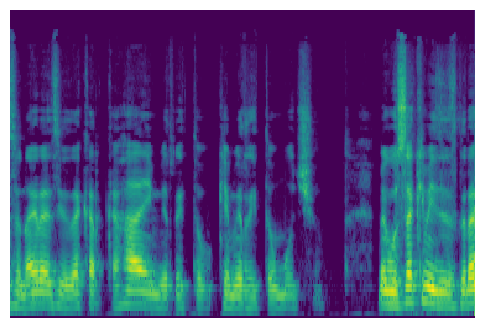

In [ ]:

output_path = '/content/drive/MyDrive/VoiceRecognition/spec.png'
at, _ = torchaudio.load(data[500])
spec = mel_spectrogram(at)

# Convert the tensor to a numpy array
mel_spec= spec[0].numpy()

# Create a new figure
plt.figure(figsize=(6, 4))

# Display the MelSpectrogram
plt.imshow(librosa.power_to_db(mel_spec), origin="lower", aspect="auto", interpolation="nearest")
plt.axis('off')  # Remove axes

# Save the MelSpectrogram as an image (e.g., PNG format)
plt.savefig(output_path, bbox_inches='tight', pad_inches=0)


In [26]:
paths = Path('/content/drive/MyDrive/VoiceRecognition/TestAudio')
data = get_files(paths, extensions='.wav')
data

(#453) [Path('/content/drive/MyDrive/VoiceRecognition/TestAudio/Daniel_Ospina/Daniel_Ospina_Test_0.wav'),Path('/content/drive/MyDrive/VoiceRecognition/TestAudio/Daniel_Ospina/Daniel_Ospina_Test_1.wav'),Path('/content/drive/MyDrive/VoiceRecognition/TestAudio/Daniel_Ospina/Daniel_Ospina_Test_2.wav'),Path('/content/drive/MyDrive/VoiceRecognition/TestAudio/Daniel_Ospina/Daniel_Ospina_Test_3.wav'),Path('/content/drive/MyDrive/VoiceRecognition/TestAudio/Daniel_Ospina/Daniel_Ospina_Test_4.wav'),Path('/content/drive/MyDrive/VoiceRecognition/TestAudio/Daniel_Ospina/Daniel_Ospina_Test_5.wav'),Path('/content/drive/MyDrive/VoiceRecognition/TestAudio/Daniel_Ospina/Daniel_Ospina_Test_6.wav'),Path('/content/drive/MyDrive/VoiceRecognition/TestAudio/Daniel_Ospina/Daniel_Ospina_Test_7.wav'),Path('/content/drive/MyDrive/VoiceRecognition/TestAudio/Daniel_Ospina/Daniel_Ospina_Test_8.wav'),Path('/content/drive/MyDrive/VoiceRecognition/TestAudio/Daniel_Ospina/Daniel_Ospina_Test_9.wav')...]

In [27]:
for audio_path in data:
    #img_path = str(audio_path).replace('Dataset', 'DatasetImages')
    img_path = str(audio_path).replace('TestAudio', 'TestImages')
    img_path = img_path.replace('.wav', '.jpg')
    at, _ = torchaudio.load(audio_path)
    spec = mel_spectrogram(at)
    # Convert the tensor to a numpy array
    mel_spec= spec[0].numpy()

    # Create a new figure
    plt.figure(figsize=(6, 4))

    # Display the MelSpectrogram
    plt.imshow(librosa.power_to_db(mel_spec), origin="lower", aspect="auto", interpolation="nearest")
    plt.axis('off')  # Remove axes

    # Save the MelSpectrogram as an image (e.g., PNG format)
    plt.savefig(img_path, bbox_inches='tight', pad_inches=0)
    plt.close()